In [139]:
pip install yfinance pandas


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [140]:
import yfinance as yf
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    data = yf.download(stock, period='6mo', interval='1d')
    data.to_csv(f"{stock}.csv")
    print(f"{stock}: Data downloaded and saved.")

C:\Users\radha\AppData\Local\Temp\ipykernel_40712\446427277.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, period='6mo', interval='1d')
[*********************100%***********************]  1 of 1 completed
C:\Users\radha\AppData\Local\Temp\ipykernel_40712\446427277.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, period='6mo', interval='1d')


RELIANCE.NS: Data downloaded and saved.


[*********************100%***********************]  1 of 1 completed
C:\Users\radha\AppData\Local\Temp\ipykernel_40712\446427277.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, period='6mo', interval='1d')


TCS.NS: Data downloaded and saved.


[*********************100%***********************]  1 of 1 completed

HDFCBANK.NS: Data downloaded and saved.


In [141]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}.csv")

    if 'Date' in stock_data.columns:
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
        stock_data.set_index('Date', inplace=True)
    else:
        stock_data.index = pd.to_datetime(stock_data.index)

    stock_data['Close'] = pd.to_numeric(stock_data['Close'], errors='coerce')

    stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
    stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()

    stock_data.to_csv(f"{stock}_with_sma.csv")
    print(f"{stock}: SMA_20 and SMA_50 added and saved.")


RELIANCE.NS: SMA_20 and SMA_50 added and saved.
TCS.NS: SMA_20 and SMA_50 added and saved.
HDFCBANK.NS: SMA_20 and SMA_50 added and saved.


In [142]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in stocks:
    stock_data = pd.read_csv(f"{stock}_with_sma.csv")

    if 'Date' in stock_data.columns:
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
        stock_data.set_index('Date', inplace=True)
    else:
        stock_data.index = pd.to_datetime(stock_data.index)

    stock_data['Buy_Signal'] = 0
    stock_data.loc[stock_data['SMA_20'] > stock_data['SMA_50'], 'Buy_Signal'] = 1

    stock_data.to_csv(f"{stock}_buy_signals.csv")
    print(f"{stock}: Buy signals generated and saved.")


RELIANCE.NS: Buy signals generated and saved.
TCS.NS: Buy signals generated and saved.
HDFCBANK.NS: Buy signals generated and saved.


In [143]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}_buy_signals.csv")

    if 'Date' in stock_data.columns:
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
        stock_data.set_index('Date', inplace=True)
    else:
        stock_data.index = pd.to_datetime(stock_data.index)

    stock_data['Close'] = pd.to_numeric(stock_data['Close'], errors='coerce')

    stock_data['Daily_Return'] = stock_data['Close'].pct_change()

    stock_data['Strategy_Return'] = stock_data['Daily_Return'] * stock_data['Buy_Signal'].shift(1)

    stock_data['Total_Market_Return'] = (1 + stock_data['Daily_Return']).cumprod()
    stock_data['Total_Strategy_Return'] = (1 + stock_data['Strategy_Return']).cumprod()

    stock_data.to_csv(f"{stock}_backtested.csv")
    print(f"{stock}: Backtesting completed and saved.")


RELIANCE.NS: Backtesting completed and saved.
TCS.NS: Backtesting completed and saved.
HDFCBANK.NS: Backtesting completed and saved.


In [144]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}_backtested.csv")

    market_return_value = stock_data['Total_Market_Return'].iloc[-1] - 1
    strategy_return_value = stock_data['Total_Strategy_Return'].iloc[-1] - 1

    sharpe_ratio = stock_data['Strategy_Return'].mean() / stock_data['Strategy_Return'].std()

    print(f"\n{stock} Performance Metrics:")
    print(f"Total Market Return: {market_return_value:.2%}")
    print(f"Total Strategy Return: {strategy_return_value:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")



RELIANCE.NS Performance Metrics:
Total Market Return: 8.88%
Total Strategy Return: 7.21%
Sharpe Ratio: 0.06

TCS.NS Performance Metrics:
Total Market Return: -24.19%
Total Strategy Return: -1.51%
Sharpe Ratio: -0.03

HDFCBANK.NS Performance Metrics:
Total Market Return: 15.05%
Total Strategy Return: 3.92%
Sharpe Ratio: 0.05


In [145]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}_backtested.csv")

    total_trades = stock_data[stock_data['Strategy_Return'] != 0].shape[0]

    print(f"{stock}: Total trades executed = {total_trades}")


RELIANCE.NS: Total trades executed = 74
TCS.NS: Total trades executed = 29
HDFCBANK.NS: Total trades executed = 76


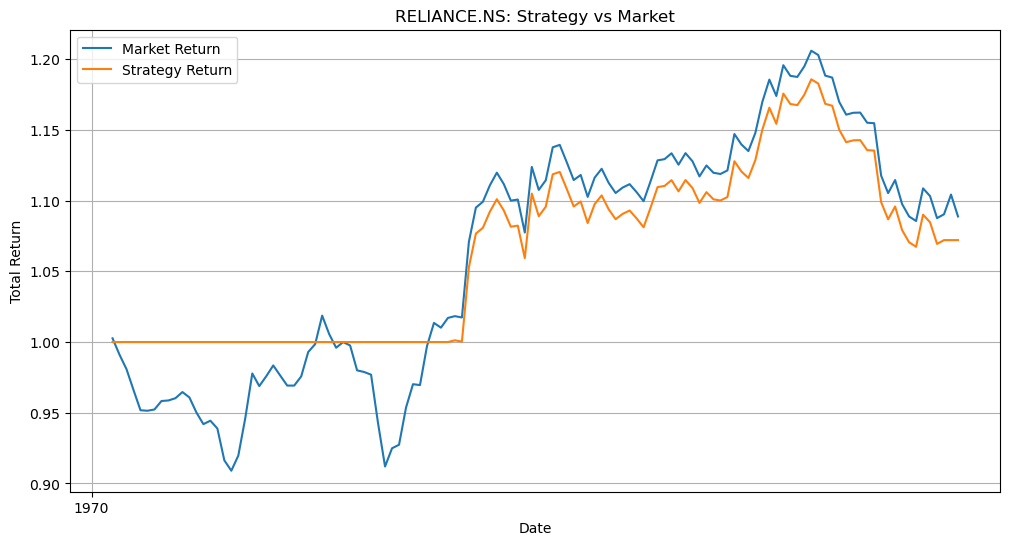

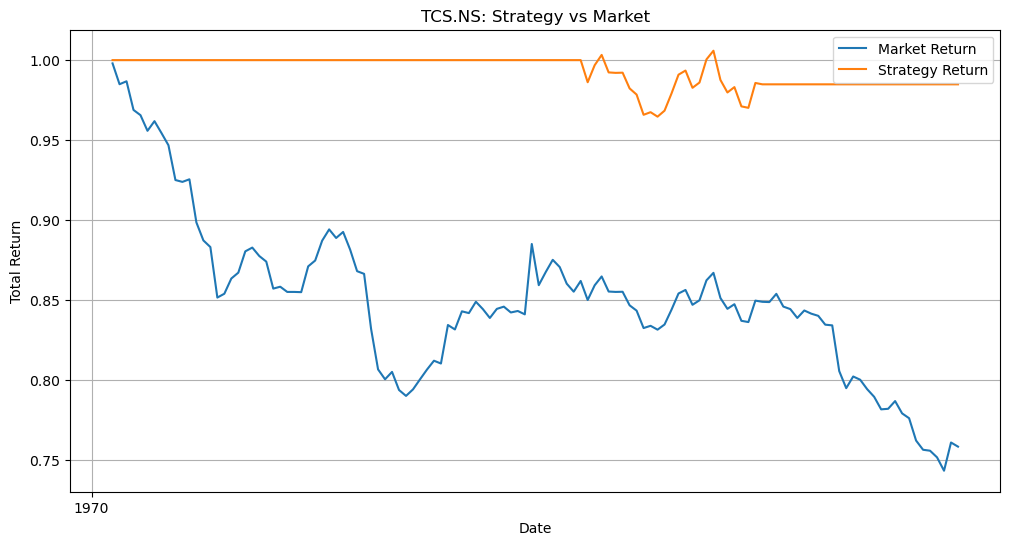

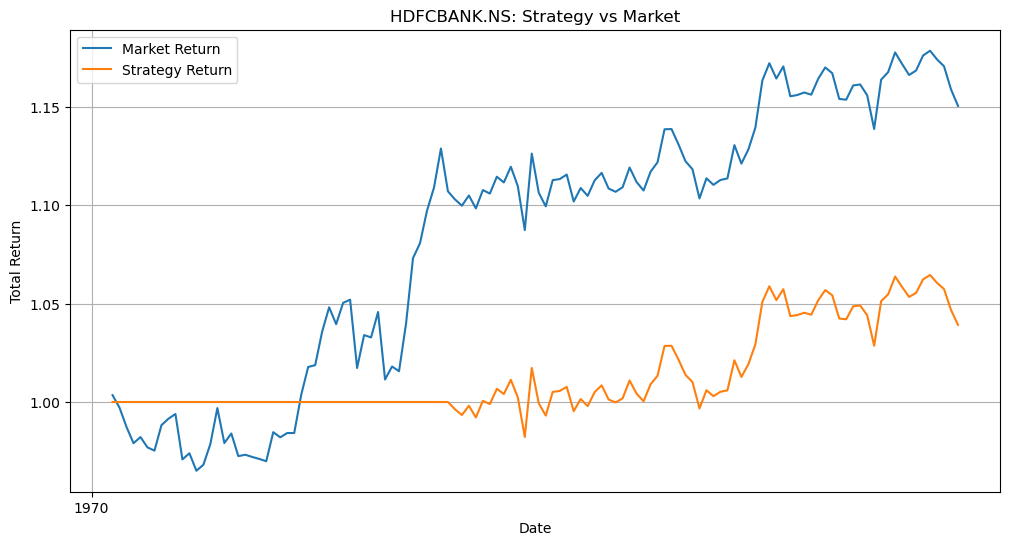

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}_backtested.csv", index_col=0)  
    
    stock_data.index = pd.to_datetime(stock_data.index)

    plt.figure(figsize=(12,6))
    plt.plot(stock_data.index, stock_data['Total_Market_Return'], label='Market Return')
    plt.plot(stock_data.index, stock_data['Total_Strategy_Return'], label='Strategy Return')

    plt.title(f'{stock}: Strategy vs Market')
    plt.xlabel('Date')
    plt.ylabel('Total Return')
    plt.legend()
    plt.grid(True)
    plt.show()


In [147]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}_backtested.csv", index_col=0)

    market_return_value = stock_data['Total_Market_Return'].iloc[-1] - 1
    strategy_return_value = stock_data['Total_Strategy_Return'].iloc[-1] - 1

    sharpe_ratio = stock_data['Strategy_Return'].mean() / stock_data['Strategy_Return'].std()

    print(f"\n{stock} Performance Metrics:")
    print(f"Total Market Return: {market_return_value:.2%}")
    print(f"Total Strategy Return: {strategy_return_value:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")



RELIANCE.NS Performance Metrics:
Total Market Return: 8.88%
Total Strategy Return: 7.21%
Sharpe Ratio: 0.06

TCS.NS Performance Metrics:
Total Market Return: -24.19%
Total Strategy Return: -1.51%
Sharpe Ratio: -0.03

HDFCBANK.NS Performance Metrics:
Total Market Return: 15.05%
Total Strategy Return: 3.92%
Sharpe Ratio: 0.05


In [148]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}_backtested.csv", index_col=0)

    total_trades = stock_data[stock_data['Strategy_Return'] != 0].shape[0]

    print(f"{stock}: Total trades executed = {total_trades}")


RELIANCE.NS: Total trades executed = 74
TCS.NS: Total trades executed = 29
HDFCBANK.NS: Total trades executed = 76


In [149]:
import pandas as pd

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}.csv", skiprows=3)
    stock_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.set_index('Date', inplace=True)
    stock_data['RSI_14'] = calculate_rsi(stock_data)
    stock_data.to_csv(f"{stock}_with_rsi.csv")
    print(f"{stock}: RSI calculated and saved.")


RELIANCE.NS: RSI calculated and saved.
TCS.NS: RSI calculated and saved.
HDFCBANK.NS: RSI calculated and saved.


In [150]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}_with_rsi.csv", index_col=0)
    
    stock_data['Buy_Sell'] = 0
    stock_data.loc[stock_data['RSI_14'] < 30, 'Buy_Sell'] = 1
    stock_data.loc[stock_data['RSI_14'] > 70, 'Buy_Sell'] = -1
    
    stock_data.to_csv(f"{stock}_with_rsi_signals.csv")
    print(f"{stock}: RSI Buy_Sell signals generated and saved.")


RELIANCE.NS: RSI Buy_Sell signals generated and saved.
TCS.NS: RSI Buy_Sell signals generated and saved.
HDFCBANK.NS: RSI Buy_Sell signals generated and saved.


In [151]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}_with_rsi_signals.csv", index_col=0)
    stock_data['Daily_Return'] = stock_data['Close'].pct_change()
    stock_data['Strategy_Return'] = stock_data['Daily_Return'] * stock_data['Buy_Sell'].shift(1).fillna(0)
    stock_data['Total_Market_Return'] = (1 + stock_data['Daily_Return']).cumprod()
    stock_data['Total_Strategy_Return'] = (1 + stock_data['Strategy_Return']).cumprod()
    stock_data.to_csv(f"{stock}_rsi_backtested.csv")
    print(f"{stock}: RSI strategy backtested and saved.")

RELIANCE.NS: RSI strategy backtested and saved.
TCS.NS: RSI strategy backtested and saved.
HDFCBANK.NS: RSI strategy backtested and saved.


In [152]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}_rsi_backtested.csv", index_col=0)
    market_return_value = stock_data['Total_Market_Return'].iloc[-1] - 1
    strategy_return_value = stock_data['Total_Strategy_Return'].iloc[-1] - 1
    sharpe_ratio = stock_data['Strategy_Return'].mean() / stock_data['Strategy_Return'].std()
    print(f"\n{stock} Performance Metrics:")
    print(f"Total Market Return: {market_return_value:.2%}")
    print(f"Total Strategy Return: {strategy_return_value:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")



RELIANCE.NS Performance Metrics:
Total Market Return: 10.78%
Total Strategy Return: 0.93%
Sharpe Ratio: 0.01

TCS.NS Performance Metrics:
Total Market Return: -24.19%
Total Strategy Return: 0.92%
Sharpe Ratio: 0.01

HDFCBANK.NS Performance Metrics:
Total Market Return: 15.72%
Total Strategy Return: 4.66%
Sharpe Ratio: 0.08


In [153]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}_rsi_backtested.csv", index_col=0)
    total_trades = (stock_data['Strategy_Return'] != 0).sum()
    print(f"{stock} — Total Trades Executed: {total_trades}")


RELIANCE.NS — Total Trades Executed: 38
TCS.NS — Total Trades Executed: 40
HDFCBANK.NS — Total Trades Executed: 17


In [154]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread

scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

creds = ServiceAccountCredentials.from_json_keyfile_name(
    "C:/Users/radha/OneDrive/Desktop/abi/vs folder/credentials.json", scope
)

client = gspread.authorize(creds)
spreadsheet = client.open("AlgoTradingSheets")


In [155]:
spreadsheet = client.open("AlgoTradingSheets")


In [156]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']
sheet_names = ['RELIANCE_RSI', 'TCS_RSI', 'HDFCBANK_RSI']

for stock, sheet_name in zip(company_shares, sheet_names):
    stock_data = pd.read_csv(f"{stock}_with_rsi.csv")
    stock_data.reset_index(inplace=True)
    stock_data = stock_data.fillna('')
    worksheet = spreadsheet.worksheet(sheet_name)
    worksheet.update([stock_data.columns.values.tolist()] + stock_data.values.tolist())
    print(f"{sheet_name}: Data pushed to Google Sheet (with index).")


RELIANCE_RSI: Data pushed to Google Sheet (with index).
TCS_RSI: Data pushed to Google Sheet (with index).
HDFCBANK_RSI: Data pushed to Google Sheet (with index).


In [157]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']

for stock in company_shares:
    stock_data = pd.read_csv(f"{stock}_with_rsi.csv", index_col=0)
    
    stock_data['Buy_Signal'] = ''
    position = 0

    for i in range(1, len(stock_data)):
        if stock_data['RSI_14'].iloc[i] < 30 and position != 1:
            stock_data.at[stock_data.index[i], 'Buy_Signal'] = 'Buy'
            position = 1
        elif stock_data['RSI_14'].iloc[i] > 70 and position != -1:
            stock_data.at[stock_data.index[i], 'Buy_Signal'] = 'Sell'
            position = -1
        else:
            stock_data.at[stock_data.index[i], 'Buy_Signal'] = 'Hold'

    stock_data['Position'] = stock_data['Buy_Signal'].map({'Buy': 1, 'Sell': -1}).fillna(0)

    stock_data['Market_Return'] = stock_data['Close'].pct_change()
    stock_data['Strategy_Return'] = stock_data['Market_Return'] * stock_data['Position'].shift(1)

    stock_data['Total_Market_Return'] = (1 + stock_data['Market_Return']).cumprod()
    stock_data['Total_Strategy_Return'] = (1 + stock_data['Strategy_Return']).cumprod()

    stock_data.reset_index(inplace=True)
    stock_data.to_csv(f"{stock}_rsi_backtested.csv", index=False)

    print(f"{stock} Backtesting saved with Buy_Signal, Strategy_Return, and Position columns.")


RELIANCE.NS Backtesting saved with Buy_Signal, Strategy_Return, and Position columns.
TCS.NS Backtesting saved with Buy_Signal, Strategy_Return, and Position columns.
HDFCBANK.NS Backtesting saved with Buy_Signal, Strategy_Return, and Position columns.


In [158]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']
sheet_names = ['RELIANCE_RSI', 'TCS_RSI', 'HDFCBANK_RSI']

for stock, sheet_name in zip(company_shares, sheet_names):
    stock_data = pd.read_csv(f"{stock}_rsi_backtested.csv")
    
    trade_logs = []
    for i in range(1, len(stock_data)):
        if stock_data['Strategy_Return'].iloc[i] != 0:
            trade_type = 'Buy' if stock_data['Position'].iloc[i] == 1 else 'Sell'
            trade_logs.append({
                'Date': stock_data['Date'].iloc[i],
                'Stock': stock,
                'Trade': trade_type,
                'Price': stock_data['Close'].iloc[i],
                'RSI': stock_data['RSI_14'].iloc[i]
            })
    
    trade_table = pd.DataFrame(trade_logs)
    trade_table.to_csv(f"{stock}_trade_log.csv", index=False)
    print(f"{stock}: Trade log saved successfully.")


RELIANCE.NS: Trade log saved successfully.
TCS.NS: Trade log saved successfully.
HDFCBANK.NS: Trade log saved successfully.


In [159]:
import os
print(os.getcwd())


c:\Users\radha\OneDrive\Desktop\abi\vs folder


In [160]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(
    "C:/Users/radha/OneDrive/Desktop/abi/vs folder/credentials.json", scope
)
client = gspread.authorize(creds)
spreadsheet = client.open("AlgoTradingSheets")

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']
sheet_names = ['RELIANCE_RSI', 'TCS_RSI', 'HDFCBANK_RSI']

for stock, sheet_name in zip(company_shares, sheet_names):
    stock_data = pd.read_csv(f"{stock}_with_rsi.csv")
    worksheet = spreadsheet.worksheet(sheet_name)
    worksheet.clear()
    worksheet.update([stock_data.columns.values.tolist()] + stock_data.fillna("").values.tolist())
    print(f"{sheet_name}: Trade Log pushed to Google Sheet.")


RELIANCE_RSI: Trade Log pushed to Google Sheet.
TCS_RSI: Trade Log pushed to Google Sheet.
HDFCBANK_RSI: Trade Log pushed to Google Sheet.


In [161]:
import pandas as pd

company_shares = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']
sheet_names = ['RELIANCE_RSI', 'TCS_RSI', 'HDFCBANK_RSI']

for stock, sheet_name in zip(company_shares, sheet_names):
    trade_log = pd.read_csv(f"{stock}_trade_log.csv")
    worksheet = spreadsheet.worksheet(sheet_name)
    worksheet.update([trade_log.columns.values.tolist()] + trade_log.values.tolist())
    print(f"{sheet_name}: Trade Log pushed to Google Sheet.")


RELIANCE_RSI: Trade Log pushed to Google Sheet.
TCS_RSI: Trade Log pushed to Google Sheet.
HDFCBANK_RSI: Trade Log pushed to Google Sheet.
